# Prediction Example 1 (Supervised Learning)
Predicing the procedure based on patient data (Age, Gender, Race) and diagnoses




In [1]:
# install the newest version 
!pip3 install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 22.1 MB 23.5 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 561.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 21.3 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=344582 sha256=1ea76a9dfc3f6fddf247f5331ecdaf37b2fc888a2eec27a3f230d0f3a6d3b39d
  Stored in directory: /tmp/pip-ephem-wheel-cache-k7coni8t/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sh

# Importing Libraries

In [2]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport

<ipython-input-2-da9ecbe9a8b2>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [3]:
# will make plot outputs appear and stored within the notebook.
%matplotlib inline

In [4]:
# check version
import pandas_profiling
#pandas_profiling.version.__version__
# => 2.9.0

In [5]:
from google.colab import drive
# mount drive to access database
drive.mount("/content/drive")

Mounted at /content/drive



# Loading Data


In [6]:
# datawarehouse path
#DB_DWH_PATH = f"{material_path}/DWH_dbs/DWH_allergy_test.db"
DB_DWH_PATH = "/content/drive/MyDrive/Gruppe_B/DB_File/source_covid19_test.db"

# connect to db
dwh_conn = sqlite3.connect(DB_DWH_PATH)

In [7]:
# list of tables in db
if dwh_conn is not None:
  dwh_cursor = dwh_conn.cursor()
  dwh_cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
  print("List of Tables", dwh_cursor.fetchall())


List of Tables [('disease',), ('patients',), ('encounters',), ('careplans',), ('conditions',), ('medications',), ('procedures',), ('observations',), ('devices',), ('imaging_studies',), ('immunizations',)]


In [9]:
# Read sqlite query results into a pandas DataFrame

# demographic data
df_patients = pd.read_sql_query("SELECT * FROM patients", dwh_conn)
# diagnoses data
df_conditions = pd.read_sql_query("SELECT * FROM conditions", dwh_conn)

# procedure data
# df_careplans = pd.read_sql_query("select * from careplans_info", dwh_conn)
df_procedures = pd.read_sql_query("SELECT * FROM procedures", dwh_conn)
# df_medications = pd.read_sql_query("SELECT * FROM MEDICATIONS_INFO", dwh_conn)

# lab_values data
# df_observations = pd.read_sql_query("select * from observations_info", dwh_conn)
# df_devices = pd.read_sql("select * from devices_info", dwh_conn)
# df_imaging = pd.read_sql_query('select * from imaging_studies_info', dwh_conn)

In [ ]:
# close db connection
# dwh_conn.close()


# Exploratory Data Analysis (EDA)


In [ ]:
# ProfileReport(df_patients)

In [10]:
df_patients.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTRY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,2002-05-05,,999-23-8106,S99926648,,Ms.,Terisa250,Kreiger457,,...,Oxford Massachusetts US,325 Robel Route Apt 85,Swampscott,Massachusetts,Essex County,1907,42.472736,-70.876528,471180.00,2784.81
1,2812f4fc-6aba-0033-728b-7e569bb8adcc,1942-05-24,,999-24-5281,S99910925,X76697172X,Mr.,Romeo514,Morar593,,...,Springfield Massachusetts US,496 Klein Wynd Unit 85,Charlton,Massachusetts,Worcester County,,42.131465,-71.970333,1606235.00,5375.37
2,9b1a203a-6368-49a5-0c79-45c32729bc17,2013-06-15,,999-75-9525,,,,Jamaal34,Hessel84,,...,Framingham Massachusetts US,184 Corkery Byway,Methuen,Massachusetts,Essex County,,42.730660,-71.159442,172970.00,2074.05
3,52a250a9-24e4-ec9b-91d6-c38cf1b10fc0,1997-11-16,,999-26-4891,S99979802,X57430890X,Ms.,Kenya524,Leuschke194,,...,Easton Massachusetts US,634 Predovic Mission Suite 14,Yarmouth,Massachusetts,Barnstable County,,41.663563,-70.234152,557170.00,2653.13
4,ad5525c0-fdab-94dc-018f-d7209c72bdef,1965-08-28,,999-29-9941,S99959414,X19338033X,Mr.,Clark193,Little434,,...,Lowell Massachusetts US,950 Kshlerin Park,Malden,Massachusetts,Middlesex County,2148,42.392584,-71.078063,68024.89,2743.96


In [11]:
df_patients.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTRY', 'ZIP',
       'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE'],
      dtype='object')

In [12]:
df_patients.shape

(1050, 25)

In [13]:
# # replacing blank values (with space) with NAN
df_patients = df_patients.replace(r'^\s*$', np.nan, regex=True)

In [14]:
df_patients.isnull().sum()

Id                        0
BIRTHDATE                 0
DEATHDATE              1000
SSN                       0
DRIVERS                 177
PASSPORT                241
PREFIX                  208
FIRST                     0
LAST                      0
SUFFIX                 1042
MAIDEN                  775
MARITAL                 352
RACE                      0
ETHNICITY                 0
GENDER                    0
BIRTHPLACE                0
ADDRESS                   0
CITY                      0
STATE                     0
COUNTRY                   0
ZIP                     499
LAT                       0
LON                       0
HEALTHCARE_EXPENSES       0
HEALTHCARE_COVERAGE       0
dtype: int64

In [15]:
df_patients.DEATHDATE.isnull().sum()

1000

In [16]:
# fill nall values with todays date
df_patients["DEATHDATE"] = df_patients.DEATHDATE.fillna(pd.to_datetime("today"))
# convert to datetime
df_patients["DEATHDATE"] = pd.to_datetime(df_patients["DEATHDATE"])
df_patients["BIRTHDATE"] = pd.to_datetime(df_patients["BIRTHDATE"])

# # calculate age 
df_patients["AGE"] = df_patients.DEATHDATE.dt.year - df_patients.BIRTHDATE.dt.year
## select variables
df_patients = df_patients[["Id", "AGE", "GENDER", "RACE"]]



In [17]:
df_patients.head()


,Id,AGE,GENDER,RACE
0,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,21,F,white
1,2812f4fc-6aba-0033-728b-7e569bb8adcc,81,M,white
2,9b1a203a-6368-49a5-0c79-45c32729bc17,10,M,white
3,52a250a9-24e4-ec9b-91d6-c38cf1b10fc0,26,F,white
4,ad5525c0-fdab-94dc-018f-d7209c72bdef,58,M,white


In [18]:
df_conditions.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2020-02-17,2020-02-27,ad5525c0-fdab-94dc-018f-d7209c72bdef,1d453a83-17f7-490d-5576-09f5725cdcaa,49727002,Cough (finding)
1,2020-02-24,2020-03-11,7f30313f-98e9-2cc2-68a5-6f9973f9ad5a,ccb50c60-5c51-3d03-3aeb-824325cfac91,49727002,Cough (finding)
2,2020-02-17,2020-02-27,ad5525c0-fdab-94dc-018f-d7209c72bdef,1d453a83-17f7-490d-5576-09f5725cdcaa,386661006,Fever (finding)
3,2020-02-17,2020-02-27,ad5525c0-fdab-94dc-018f-d7209c72bdef,1d453a83-17f7-490d-5576-09f5725cdcaa,36955009,Loss of taste (finding)
4,2020-02-17,2020-02-17,ad5525c0-fdab-94dc-018f-d7209c72bdef,1d453a83-17f7-490d-5576-09f5725cdcaa,840544004,Suspected COVID-19


In [ ]:
# ProfileReport(df_conditions)

In [19]:
# rename some columns for clarification
df_conditions.rename(columns={"CODE": "CODE_CONDITION", "DESCRIPTION": "CONDITION_DESCRIPTION"}, inplace=True)

# replacing blank values (with space) with NAN
df_conditions = df_conditions.replace(r'^\s*$', np.nan, regex=True)

# fill null values
df_conditions["STOP"] = df_conditions.STOP.fillna(pd.to_datetime("today"))

# convert to datetime
df_conditions["START"] = pd.to_datetime(df_conditions["START"])
df_conditions["STOP"] = pd.to_datetime(df_conditions["STOP"])

# calculate duration of a diagnose
df_conditions["DURATION_CONDITION"] = df_conditions.STOP.dt.to_period("M").astype(int) - df_conditions.START.dt.to_period("M").astype(int)

# remove unnecessary variables
df_conditions.drop(['START', 'STOP', 'ENCOUNTER'], axis=1, inplace=True)

<ipython-input-19-3ad1d8d49fad>:15: FutureWarning: casting period[M] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df_conditions["DURATION_CONDITION"] = df_conditions.STOP.dt.to_period("M").astype(int) - df_conditions.START.dt.to_period("M").astype(int)


In [20]:
df_conditions.shape

(6375, 4)

In [21]:
# join two datasets
df = pd.DataFrame.merge(df_patients, df_conditions, left_on="Id", right_on="PATIENT", how="inner")
df.drop("PATIENT", axis=1, inplace=True)
df.shape

(6375, 7)

In [22]:
df.head()

,Id,AGE,GENDER,RACE,CODE_CONDITION,CONDITION_DESCRIPTION,DURATION_CONDITION
0,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,21,F,white,386661006,Fever (finding),1
1,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,21,F,white,36955009,Loss of taste (finding),1
2,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,21,F,white,840544004,Suspected COVID-19,0
3,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,21,F,white,840539006,COVID-19,1
4,2812f4fc-6aba-0033-728b-7e569bb8adcc,81,M,white,49727002,Cough (finding),0


In [23]:
ProfileReport(df_procedures)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
df_procedures.head()

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2020-03-16T02:35:43Z,52a250a9-24e4-ec9b-91d6-c38cf1b10fc0,e6242b21-5765-8fb9-d596-07dc2b93bd0d,261352009,Face mask (physical object),4.67,840544004,Suspected COVID-19
1,2020-02-20T11:01:53Z,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,f6cef47b-5959-a7a4-5c13-0d860067403f,261352009,Face mask (physical object),3.10,840544004,Suspected COVID-19
2,2020-03-03T17:40:13Z,2812f4fc-6aba-0033-728b-7e569bb8adcc,9e07f1e2-f3bf-a2c6-504e-57e0568a5539,261352009,Face mask (physical object),1.33,840544004,Suspected COVID-19
3,2020-02-24T15:16:17Z,7f30313f-98e9-2cc2-68a5-6f9973f9ad5a,ccb50c60-5c51-3d03-3aeb-824325cfac91,261352009,Face mask (physical object),3.56,840544004,Suspected COVID-19
4,2020-03-02T00:36:47Z,9b1a203a-6368-49a5-0c79-45c32729bc17,ef869a22-3505-1ee3-0e5a-43b595043e7c,261352009,Face mask (physical object),1.95,840544004,Suspected COVID-19


In [25]:
# rename variables
df_procedures.rename(columns={"CODE":"CODE_PROCEDURE", "DESCRIPTION":"PROCEDURE_DESCRIPTION"}, inplace=True)
df_procedures = df_procedures[["PATIENT", "CODE_PROCEDURE", "PROCEDURE_DESCRIPTION"]]

In [26]:
df = pd.DataFrame.merge(df, df_procedures, left_on="Id", right_on="PATIENT", how="inner")
df.drop("PATIENT", axis=1, inplace=True)
df.shape

(47616, 9)

## Understanding Data/Basic Data Exploration


In [27]:
# .head() returns the first 5 rows of my dataset. This is useful if you want to see some example values for each variable.
df.head()

,Id,AGE,GENDER,RACE,CODE_CONDITION,CONDITION_DESCRIPTION,DURATION_CONDITION,CODE_PROCEDURE,PROCEDURE_DESCRIPTION
0,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,21,F,white,386661006,Fever (finding),1,261352009,Face mask (physical object)
1,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,21,F,white,36955009,Loss of taste (finding),1,261352009,Face mask (physical object)
2,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,21,F,white,840544004,Suspected COVID-19,0,261352009,Face mask (physical object)
3,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,21,F,white,840539006,COVID-19,1,261352009,Face mask (physical object)
4,2812f4fc-6aba-0033-728b-7e569bb8adcc,81,M,white,49727002,Cough (finding),0,261352009,Face mask (physical object)


In [28]:
# .shape returns the number of rows by the number of columns
#size of dataset
df.shape

(47616, 9)

In [29]:
# .columns returns the name of all of your columns in the dataset.
df.columns

Index(['Id', 'AGE', 'GENDER', 'RACE', 'CODE_CONDITION',
       'CONDITION_DESCRIPTION', 'DURATION_CONDITION', 'CODE_PROCEDURE',
       'PROCEDURE_DESCRIPTION'],
      dtype='object')

In [30]:
# attribute type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47616 entries, 0 to 47615
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     47616 non-null  object
 1   AGE                    47616 non-null  int64 
 2   GENDER                 47616 non-null  object
 3   RACE                   47616 non-null  object
 4   CODE_CONDITION         47616 non-null  int64 
 5   CONDITION_DESCRIPTION  47616 non-null  object
 6   DURATION_CONDITION     47616 non-null  int64 
 7   CODE_PROCEDURE         47616 non-null  int64 
 8   PROCEDURE_DESCRIPTION  47616 non-null  object
dtypes: int64(4), object(5)
memory usage: 3.6+ MB


In [31]:
# .describe summarizes the count, mean, standard deviation, min, and max for numerical variables.
df.describe()

,AGE,CODE_CONDITION,DURATION_CONDITION,CODE_PROCEDURE
count,47616.000000,4.761600e+04,47616.000000,4.761600e+04
mean,57.542822,2.778414e+12,19.030368,3.466219e+08
std,23.183546,1.896774e+13,58.589847,1.096383e+08
min,3.000000,2.229801e+07,0.000000,1.356900e+07
25%,41.000000,6.685701e+07,0.000000,3.024970e+08
50%,59.000000,2.671020e+08,0.000000,3.719080e+08
75%,72.000000,7.068700e+08,35.000000,4.311820e+08
max,113.000000,1.322810e+14,1130.000000,4.473650e+08


In [ ]:
# replacing blank values (with space) with NAN
# df = df.replace(r'^\s*$', np.nan, regex=True)


In [32]:
# .nunique(axis=0) returns the number of unique values for each variable.
df.nunique(axis=0)


Id                       935
AGE                      105
GENDER                     2
RACE                       4
CODE_CONDITION            41
CONDITION_DESCRIPTION     41
DURATION_CONDITION       172
CODE_PROCEDURE            17
PROCEDURE_DESCRIPTION     17
dtype: int64

In [ ]:
# profile = ProfileReport(df)
# profile

## Cleaning Dataset


### Removing Duplicate Rows


In [33]:
print("Number of Duplicated Rows", df.duplicated(df.columns).sum())

Number of Duplicated Rows 34504


In [35]:
# dropping duplicate values if exists and keep first one
df.drop_duplicates(keep="first",inplace=True) 
print("Size of dataset after removing duplicated rows", df.shape)

Size of dataset after removing duplicated rows (13112, 9)


### Removing Missing Values

In [36]:
# number of null values in each column
df.isnull().sum()

Id                       0
AGE                      0
GENDER                   0
RACE                     0
CODE_CONDITION           0
CONDITION_DESCRIPTION    0
DURATION_CONDITION       0
CODE_PROCEDURE           0
PROCEDURE_DESCRIPTION    0
dtype: int64

In [37]:
# drop rows contain null values
df = df.dropna(how='any',axis=0) 


## Univariate Analysis

### Grouping

In [38]:
# number of patients in procedure table
df.groupby(["Id"]).size()

Id
0033cec2-67d3-39ec-b0f4-29f91a2918d6     4
00680fcd-0ef2-99c5-f69d-59463206750f    60
00f4a426-4746-6513-1775-1e8650e2f6b5     5
00f8ffa0-e135-059c-32e9-54a79b5f612e     7
00ff2a47-af82-8681-cb1d-428471df02f0    40
                                        ..
ff1a2c6d-6ae4-1737-ff36-4e76782efe6c     5
ff2d586c-f770-a795-c9eb-0b0d39447e48     5
ff9e749b-0abc-22f8-0d62-6912b87781b1     6
ffd905f3-45fb-b2a7-7429-bf864ef29d81    66
ffe52b9f-cdf1-d315-9286-e64d370edde4     5
Length: 935, dtype: int64


There are info for 133 patients in table.



In [39]:
df.groupby(["Id", "CODE_CONDITION"]).size()

Id                                    CODE_CONDITION
0033cec2-67d3-39ec-b0f4-29f91a2918d6  49727002          1
                                      386661006         1
                                      840539006         1
                                      840544004         1
00680fcd-0ef2-99c5-f69d-59463206750f  25064002          4
                                                       ..
ffe52b9f-cdf1-d315-9286-e64d370edde4  25064002          1
                                      36955009          1
                                      49727002          1
                                      386661006         1
                                      840544004         1
Length: 6366, dtype: int64

In [40]:
df.groupby(["Id", "CODE_PROCEDURE"]).size()

Id                                    CODE_PROCEDURE
0033cec2-67d3-39ec-b0f4-29f91a2918d6  261352009          4
00680fcd-0ef2-99c5-f69d-59463206750f  261352009         15
                                      371908008         15
                                      399208008         15
                                      431182000         15
                                                        ..
ffd905f3-45fb-b2a7-7429-bf864ef29d81  261352009         11
                                      371908008         11
                                      399208008         11
                                      431182000         11
ffe52b9f-cdf1-d315-9286-e64d370edde4  261352009          5
Length: 1539, dtype: int64

For some patients, there are more than one diagnose code and procedure code.

---



### Histogram



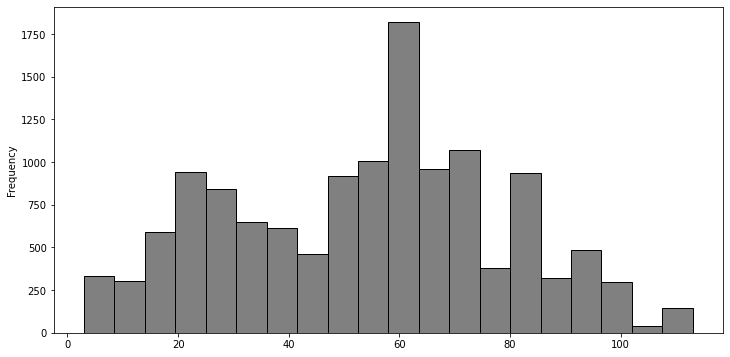

In [41]:
df['AGE'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

In [ ]:
# # binning age column and remove age attribute
# bins = [i for i in range(df.AGE.min(), df.AGE.max(), 10)]
# df['AGE_BINS'] = pd.cut(x=df['AGE'], bins=bins)
# df.drop(["AGE_BINS"], axis=1, inplace=True)

In [ ]:
# distribution of GENDER attribute
# sns.countplot(x="variable", hue= "value", data=pd.melt(df[["AGE_BINS"]]))

In [42]:
# removing outlier
df = df[(df.AGE < 90) & (df.AGE > 20)]
df.shape

(10730, 9)


### Boxplot and Remove Outlier
Another way to visualize the distribution of a variable is a boxplot

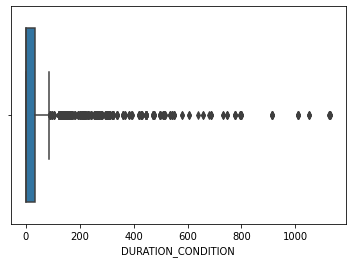

In [43]:
sns.boxplot(x=df["DURATION_CONDITION"])

In [44]:
df = df[df["DURATION_CONDITION"]<1200]
df.shape

(10730, 9)

### Countplot

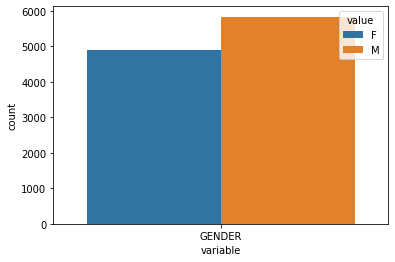

In [45]:
# distribution of GENDER attribute
sns.countplot(x="variable", hue= "value", data=pd.melt(df[["GENDER"]]))

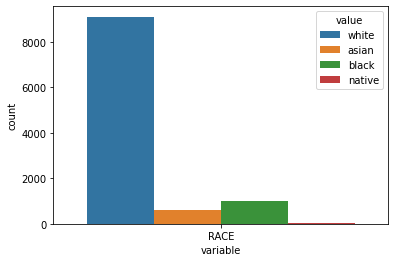

In [46]:
# distribution of RACE attribute
sns.countplot(x="variable", hue= "value", data=pd.melt(df[["RACE"]]))

In [47]:
# convert categorical variable to numerical by replacing
df.GENDER.replace(['M', 'F'], [0, 1], inplace=True)
df.RACE.replace(["white", "black", "asian"], [1, 2, 3], inplace=True)


##  Multivariate Analysis: Analyzing Relationships Between Variables

Correlation matrices and scatterplots are useful for exploring the relationship between two variables.


### Correlation Matrix


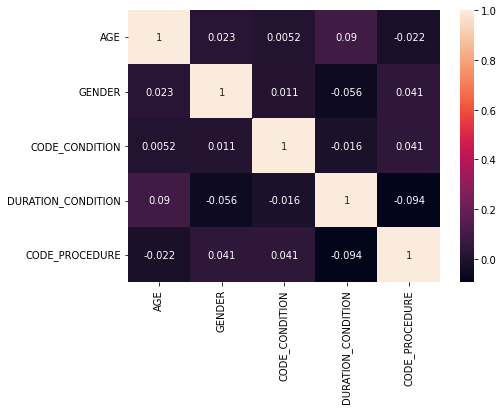

In [48]:
# Generating the correlating matrix
corr = df.corr()
plt.figure(figsize=(7, 5))
# Generating the correlation heat-map
sns.heatmap(corr, annot=True)

In [49]:
# df subset contains numerical variables
numdf = df.select_dtypes(include=np.number)
# df subset contains categorical variables
catdf = df.select_dtypes(exclude=np.number)
numdf.shape, catdf.shape

((10730, 5), (10730, 4))



We can remove high correlated variables.





In [50]:

# select feature with correlation less than a threshold
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False

selected_columns = numdf.columns[columns]
selected_columns


Index(['AGE', 'GENDER', 'CODE_CONDITION', 'DURATION_CONDITION',
       'CODE_PROCEDURE'],
      dtype='object')

In [51]:
# new dataset after removing high correlated features
df = pd.concat([df[selected_columns], catdf], axis=1)
df.shape

(10730, 9)

### Scatterplot


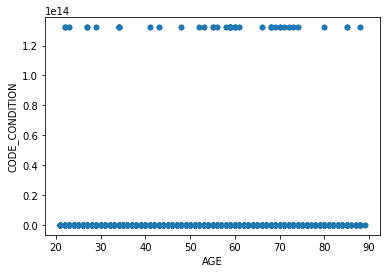

In [52]:
df.plot(kind='scatter', y='CODE_CONDITION', x='AGE')


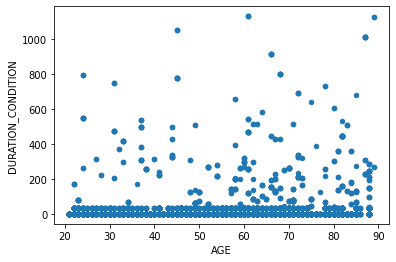

In [53]:
df.plot(kind='scatter', y='DURATION_CONDITION', x='AGE')

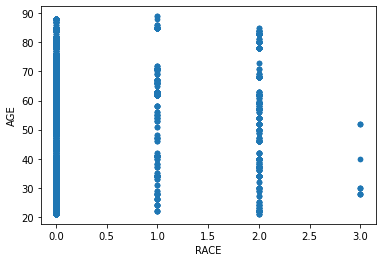

In [55]:
df['RACE'] = pd.factorize(df['RACE'])[0]

df.plot(kind='scatter', y='AGE', x='RACE')


# Modelling Data

We can use classification methods to create a model and find the relation between some independent variables such as age, race, gender, code_condition and target attribute (code_procedure).

This section includes:
* Data preparation:    
    * shuffling dataset
    * converting categorical features to numerical (if necessary)
    * spliting data to features and target variables
    * spliting data to train, validation and test data, 70% for train, 15% for test and validation.
* Training and parameter tuning
    * RandomForest
    * XGBoost
* Evaluation
* Prediction



In [56]:
# import python packages for ML models
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Data Preparation

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10730 entries, 0 to 47007
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   AGE                    10730 non-null  int64 
 1   GENDER                 10730 non-null  int64 
 2   CODE_CONDITION         10730 non-null  int64 
 3   DURATION_CONDITION     10730 non-null  int64 
 4   CODE_PROCEDURE         10730 non-null  int64 
 5   Id                     10730 non-null  object
 6   RACE                   10730 non-null  int64 
 7   CONDITION_DESCRIPTION  10730 non-null  object
 8   PROCEDURE_DESCRIPTION  10730 non-null  object
dtypes: int64(6), object(3)
memory usage: 838.3+ KB


In [58]:
# shuffle data, frac=1 means 100 percent of dataset will be shuffled
df = df.sample(frac=1)

In [59]:
df.shape

(10730, 9)

In [60]:
# split data to train, test and validation dataframes 
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# test df is now 15% of the entire data set
df_train, df_test = train_test_split(df, test_size=test_ratio, random_state=0)
df_train.shape, df_test.shape

((9120, 9), (1610, 9))

In [61]:
# split data to features and target dataframes 
X = df_train.drop(["Id", "CODE_PROCEDURE", "CONDITION_DESCRIPTION", 'PROCEDURE_DESCRIPTION'], axis=1)
y = df_train["CODE_PROCEDURE"]

# split data to train and validation dataframes 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=validation_ratio, random_state=0)

X_train.shape, X_val.shape

((7752, 5), (1368, 5))

## RandomForest Model

### Training

In [62]:
# RandomForest Classifier
rf = RandomForestClassifier(n_estimators=10, max_depth=6, random_state=0)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, n_estimators=10, random_state=0)

### Ranking the Features

Feature ranking:
1. feature 3 (0.547927)
2. feature 0 (0.239175)
3. feature 2 (0.143997)
4. feature 1 (0.039780)
5. feature 4 (0.029120)


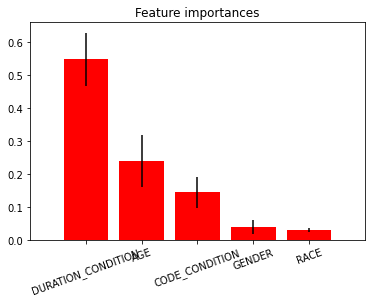

In [63]:
# feature importance
importances = rf.feature_importances_
features = X.columns

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=20)
plt.xlim([-1, X.shape[1]])
plt.show()

### Model Evaluation


In [64]:
# predicted value for train and test dataset
pred_train = rf.predict(X_train)
pred_val = rf.predict(X_val)

In [65]:
# calculate Accuracy score for train and validation data
acc_train = accuracy_score(y_train, pred_train)
acc_val = accuracy_score(y_val, pred_val)

acc_train, acc_val

(0.4695562435500516, 0.45687134502923976)

## Xgboost Model (**Grid Search**)

### Training

In [66]:
# Create the parameter grid search
param_grid = {
    'learning_rate': [0.05, 0.5], #so called `eta` value    
    'max_depth': [2, 5, 10, 15],
    'colsample_bytree': [0.4],
    # "objective" :["reg:tweedie"],
    'gamma':[0],               
    'min_child_weight':[1.5],
    'n_estimators' : [5, 10],                                                                    
    'reg_alpha': [0.75],
    'reg_lambda' : [0.45],
    'subsample' : [0.6],
    'seed' : [42]
}
   
# Create a based model
xgb = XGBClassifier()
# Instantiate the grid search model
grid_search_xgb = GridSearchCV(estimator = xgb, 
                               param_grid=param_grid,
                               cv=3,
                               n_jobs=-1,
                               verbose=2)

In [67]:
# Fit the grid search to the data
grid_search_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4], 'gamma': [0],
                         'learning_rate': [0.05, 0.5],
                         'max_depth': [2, 5, 10, 15], 'min_child_weight': [1.5],
                         'n_estimators': [5, 10], 'reg_alpha': [0.75],
                         'reg_lambda': [0.45], 'seed': [42],
                         'subsample': [0.6]},
             verbose=2)

In [68]:
# best parameters after grid search
grid_search_xgb.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 2,
 'min_child_weight': 1.5,
 'n_estimators': 5,
 'reg_alpha': 0.75,
 'reg_lambda': 0.45,
 'seed': 42,
 'subsample': 0.6}

### Model Evaluation


In [69]:
# Best model
best_grid_xgb = grid_search_xgb.best_estimator_

# Evaluating the Algorithm for train data
pred_train_xgb = best_grid_xgb.predict(X_train)
print('Accuracy for train data:', accuracy_score(y_train, pred_train_xgb))  

# Evaluating the Algorithm for test data
pred_test_xgb = best_grid_xgb.predict(X_val)
acc_xgb = round(accuracy_score(y_val, pred_test_xgb), 5)
print('Accuracy for test data:', acc_xgb)

Accuracy for train data: 0.46039731682146545
Accuracy for test data: 0.46637


## Prediction

In [70]:
df_test.shape

(1610, 9)

In [71]:
df_test.columns

Index(['AGE', 'GENDER', 'CODE_CONDITION', 'DURATION_CONDITION',
       'CODE_PROCEDURE', 'Id', 'RACE', 'CONDITION_DESCRIPTION',
       'PROCEDURE_DESCRIPTION'],
      dtype='object')

In [72]:
selected_columns = X.columns

In [73]:

x_test = df_test[X.columns]
df_test["RF_prediction"] = rf.predict(x_test)
df_test["XGB_prediction"] = best_grid_xgb.predict(x_test)


In [74]:
df_test.head()

,AGE,GENDER,CODE_CONDITION,DURATION_CONDITION,CODE_PROCEDURE,Id,RACE,CONDITION_DESCRIPTION,PROCEDURE_DESCRIPTION,RF_prediction,XGB_prediction
40174,57,0,840544004,0,431182000,ac1c63de-5c72-a482-4d1a-3cea500dba3f,0,Suspected COVID-19,Placing subject in prone position (procedure),261352009,261352009
14174,65,0,840539006,0,431182000,76d0b5d4-c286-3aac-c2b0-5a92eb758170,0,COVID-19,Placing subject in prone position (procedure),261352009,261352009
16714,44,1,410429000,428,261352009,3898a474-3c43-aacd-5f76-368c7b991693,0,Cardiac Arrest,Face mask (physical object),261352009,261352009
6469,53,1,36955009,1,261352009,456a3009-6320-9bf9-d6cc-a8372d95f3e7,0,Loss of taste (finding),Face mask (physical object),261352009,261352009
621,59,1,49727002,0,371908008,b7f0aa3e-0678-7d03-ee5a-74da32590ac4,2,Cough (finding),Oxygen administration by mask (procedure),261352009,261352009


#Exporting Results to an Excel File

In [75]:
df.to_excel("Procedure_prediction.xlsx", index=False, sheet_name="Prediction")